In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
colnames = ['area', 'rooms', 'price']
dataset = pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/refs/heads/master/ex1data2.txt", names=colnames)
dataset

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [3]:
dataset.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [4]:
area  = dataset.iloc[0:dataset.shape[0],0:1]
rooms = dataset.iloc[0:dataset.shape[0],1:2]
price = dataset.iloc[0:dataset.shape[0],2:3]

In [5]:
# Function of Normalization
def feature_normalization(x):
  mean = np.mean(x,axis=0)
  std = np.std(x,axis=0)
  x_normalized = (x - mean) / std
  return x_normalized, mean, std

In [6]:
# Linear regression
def hypothesis(theta_array, x1, x2):
  return theta_array[0] + theta_array[1] * x1 + theta_array[2] * x2

def cost_function(theta_array, x1, x2, y, m):
  errors = 0
  for i in range(m):
    errors = errors + ((theta_array[0] + theta_array[1] * x1[i] + theta_array[2] * x2[i]) - y[i]) ** 2
  return errors / (2*m)

In [7]:
# Gradient Descent Approach
def gradient_descent(theta_array, x1, x2, y, m, alpha):
  summation_0 = 0
  summation_1 = 0
  summation_2 = 0
  for i in range(m):
    summation_0 = summation_0 + (theta_array[0] + theta_array[1] * x1[i] + theta_array[2] * x2[i]) - y[i]
    summation_1 = summation_1 + ((theta_array[0] + theta_array[1] * x1[i]) + theta_array[2] * x1[i] - y[i]) * x1[i]
    summation_2 = summation_2 + ((theta_array[0] + theta_array[2] * x1[i] + theta_array[2] * x2[i]) - y[i]) * x2[i]

  new_theta0 = theta_array[0] - (alpha/m) * summation_0
  new_theta1 = theta_array[1] - (alpha/m) * summation_1
  new_theta2 = theta_array[2] - (alpha/m) * summation_2
  updated_new_theta = [new_theta0,new_theta1,new_theta2]
  return updated_new_theta

In [8]:
# Training function
def training(x1, x2 ,y,alpha,iterations):
  m = x1.size
  cost_values = []
  theta_array = np.zeros((3,1))

  for i in range(iterations):
    theta_array = gradient_descent(theta_array, x1, x2, y, m, alpha)
    cost_values.append(cost_function(theta_array, x1, x2, y, m))

  return cost_values, theta_array

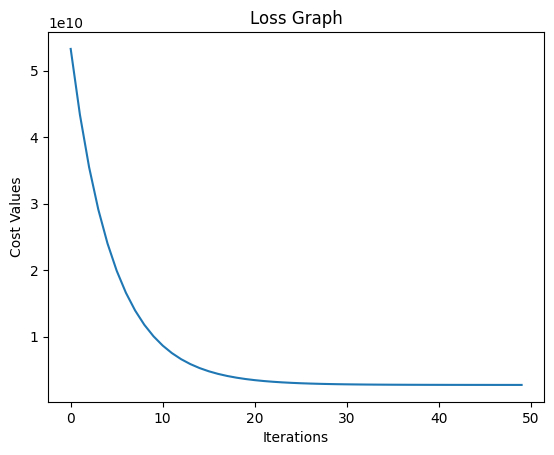

In [9]:
alpha = 0.1
iterations = 50
x1 = area.values
x2 = rooms.values
y = price.values
x1, mean1, std1 = feature_normalization(x1)
x2, mean2, std2 = feature_normalization(x2)
cost_values, theta_array = training(x1, x2 , y, alpha,iterations)
x_axis = np.arange(0, len(cost_values), step=1)
plt.plot(x_axis,cost_values)
plt.xlabel("Iterations")
plt.ylabel("Cost Values")
plt.title("Loss Graph")
plt.show()

In [10]:
print(theta_array)

[array([338658.2492493]), array([70639.07690496]), array([35063.21452922])]
